#Importing libraries


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import cv2 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Load the Dataset

In [ ]:
train_path = "/content/drive/MyDrive/Training"

img_size= 200

#Seperate Labels and Features

In [ ]:
X = []
Y = []


for i in os.listdir(train_path):
    for j in os.listdir(train_path+"/"+i):
        img = cv2.imread(train_path+"/"+i+'/'+j)
        img = cv2.resize(img,(img_size,img_size))
        X.append(img) 
        Y.append(i)

In [ ]:
Y = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(Y)]

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X = (np.array(X))/255
Y = (np.array(Y))

In [ ]:
pd.Series(Y).value_counts()

3    827
1    826
2    822
0    395
dtype: int64

#Split dataset into test and train

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [ ]:
print("Shape of X train: ",X_train.shape)
print("Shape of y train: ",y_train.shape)

Shape of X train:  (2296, 200, 200, 3)
Shape of y train:  (2296,)


##Model1: Use dropout after conv & Fully connected layers without Batch normalization

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

##Compile the model


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               1

##Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop=EarlyStopping(patience=3)
reduceLR=ReduceLROnPlateau(patience=2)

##Train the model

In [ ]:
model1 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 32,callbacks =[reduceLR] )

Epoch 1/5
72/72 [==============================] - 118s 2s/step - loss: 1.1372 - accuracy: 0.5780 - val_loss: 0.6005 - val_accuracy: 0.7631 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 116s 2s/step - loss: 0.5359 - accuracy: 0.7853 - val_loss: 0.4331 - val_accuracy: 0.8345 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 117s 2s/step - loss: 0.3393 - accuracy: 0.8606 - val_loss: 0.3589 - val_accuracy: 0.8484 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 117s 2s/step - loss: 0.1977 - accuracy: 0.9286 - val_loss: 0.4061 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 117s 2s/step - loss: 0.1629 - accuracy: 0.9434 - val_loss: 0.3649 - val_accuracy: 0.8763 - lr: 0.0010


##Plot loss and Accuracy graph


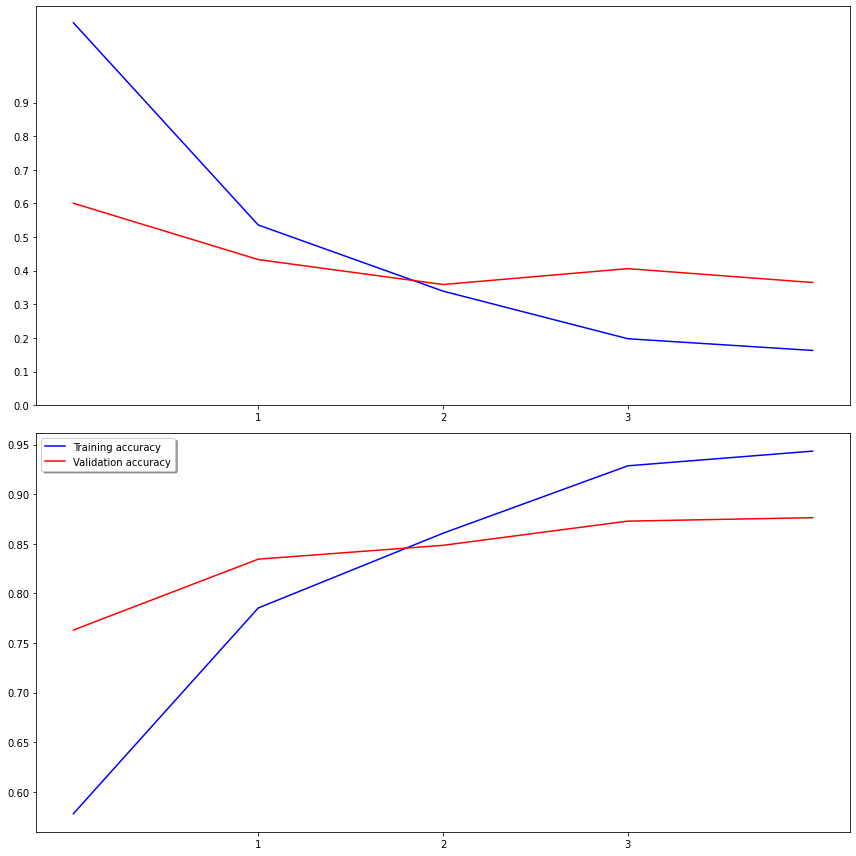

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model1.history['loss'], color='b', label="Training loss")
ax1.plot(model1.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 4, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model1.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model1.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 4, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Model2: Remove drop out ,use Batch normalization


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

##Train the model

In [ ]:
model2 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 32,callbacks =[reduceLR] )

Epoch 1/5
72/72 [==============================] - 120s 2s/step - loss: 0.8016 - accuracy: 0.6973 - val_loss: 0.6684 - val_accuracy: 0.7596 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 118s 2s/step - loss: 0.3547 - accuracy: 0.8750 - val_loss: 0.6471 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 118s 2s/step - loss: 0.1580 - accuracy: 0.9512 - val_loss: 1.5686 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 118s 2s/step - loss: 0.0887 - accuracy: 0.9752 - val_loss: 1.1983 - val_accuracy: 0.6063 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 118s 2s/step - loss: 0.0329 - accuracy: 0.9961 - val_loss: 0.4869 - val_accuracy: 0.8014 - lr: 1.0000e-04


##Plot loss and accuracy graph 

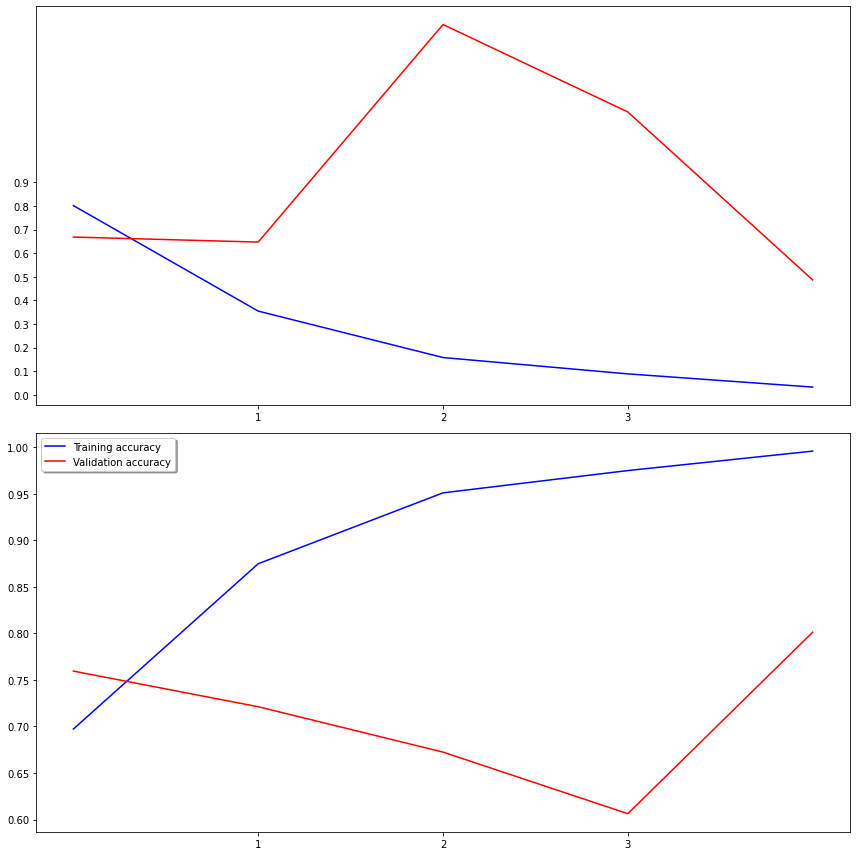

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model2.history['loss'], color='b', label="Training loss")
ax1.plot(model2.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 4, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model2.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model2.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 4, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Model3:Remove dropout & use L2 regularization

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 147456)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

##Train the model

In [ ]:
model3 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 32,callbacks =[reduceLR] )

Epoch 1/5
72/72 [==============================] - 126s 2s/step - loss: 2.5191 - accuracy: 0.5144 - val_loss: 1.2529 - val_accuracy: 0.6498 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 125s 2s/step - loss: 1.1079 - accuracy: 0.6868 - val_loss: 1.0239 - val_accuracy: 0.7038 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 125s 2s/step - loss: 0.9068 - accuracy: 0.7430 - val_loss: 0.8953 - val_accuracy: 0.7265 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 125s 2s/step - loss: 0.7831 - accuracy: 0.7787 - val_loss: 0.8314 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 126s 2s/step - loss: 0.6971 - accuracy: 0.8149 - val_loss: 0.7201 - val_accuracy: 0.8171 - lr: 0.0010


#Plot loss and accuracy graph

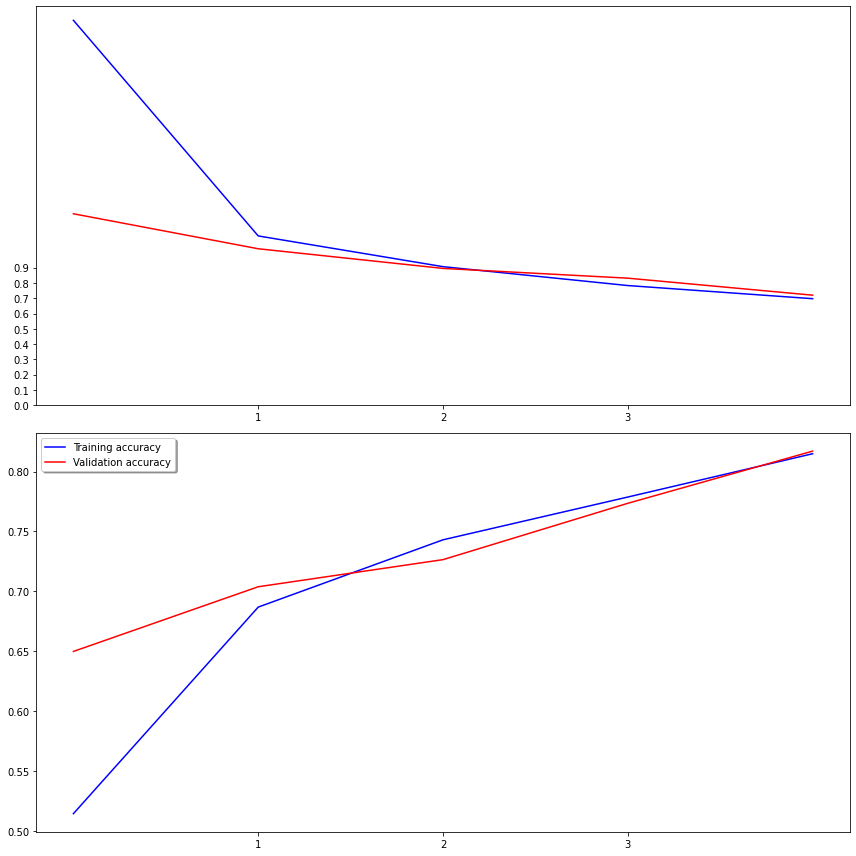

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model3.history['loss'], color='b', label="Training loss")
ax1.plot(model3.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 4, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model3.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model3.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 4, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Model4:Use dropout after convolution layer,L2 in Fully connected layer,Batch normalization after conv-Layer

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 147456)           

##Train the model

In [ ]:
model4 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 32,callbacks =[reduceLR] )

Epoch 1/5
72/72 [==============================] - 129s 2s/step - loss: 1.9642 - accuracy: 0.5553 - val_loss: 1.2229 - val_accuracy: 0.6690 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 129s 2s/step - loss: 1.2090 - accuracy: 0.7034 - val_loss: 1.1214 - val_accuracy: 0.7195 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 128s 2s/step - loss: 1.0521 - accuracy: 0.7626 - val_loss: 0.9611 - val_accuracy: 0.7979 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 127s 2s/step - loss: 0.9766 - accuracy: 0.7909 - val_loss: 0.9174 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 128s 2s/step - loss: 0.8828 - accuracy: 0.8219 - val_loss: 0.9260 - val_accuracy: 0.8136 - lr: 0.0010


##Plot Loss and Accuracy Graph

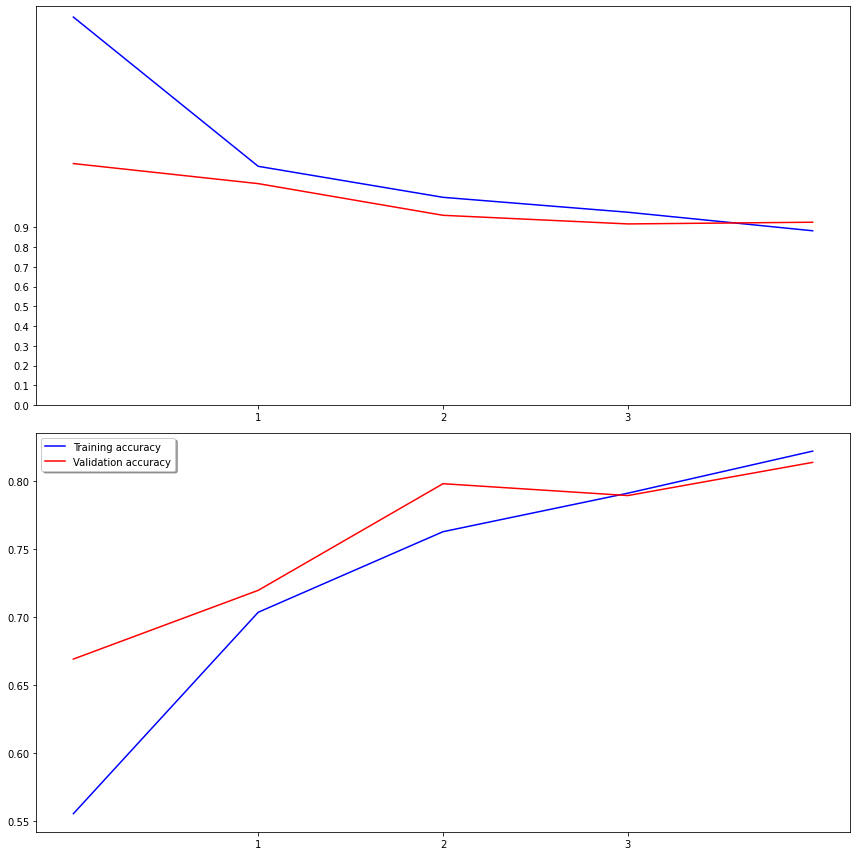

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model4.history['loss'], color='b', label="Training loss")
ax1.plot(model4.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 4, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model4.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model4.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 4, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

##Model5: Add a new convolution layer.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size,3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

##Train the model

In [ ]:
model5 = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs =5,verbose = 1,batch_size = 32,callbacks =[reduceLR] )

Epoch 1/5
72/72 [==============================] - 140s 2s/step - loss: 1.4859 - accuracy: 0.6058 - val_loss: 1.0001 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 2/5
72/72 [==============================] - 141s 2s/step - loss: 0.9030 - accuracy: 0.7260 - val_loss: 0.9679 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 3/5
72/72 [==============================] - 142s 2s/step - loss: 0.7584 - accuracy: 0.8062 - val_loss: 0.7147 - val_accuracy: 0.8066 - lr: 0.0010
Epoch 4/5
72/72 [==============================] - 142s 2s/step - loss: 0.6868 - accuracy: 0.8214 - val_loss: 0.6853 - val_accuracy: 0.8397 - lr: 0.0010
Epoch 5/5
72/72 [==============================] - 141s 2s/step - loss: 0.6491 - accuracy: 0.8463 - val_loss: 0.7566 - val_accuracy: 0.7857 - lr: 0.0010


##Plot loss and accuracy graph

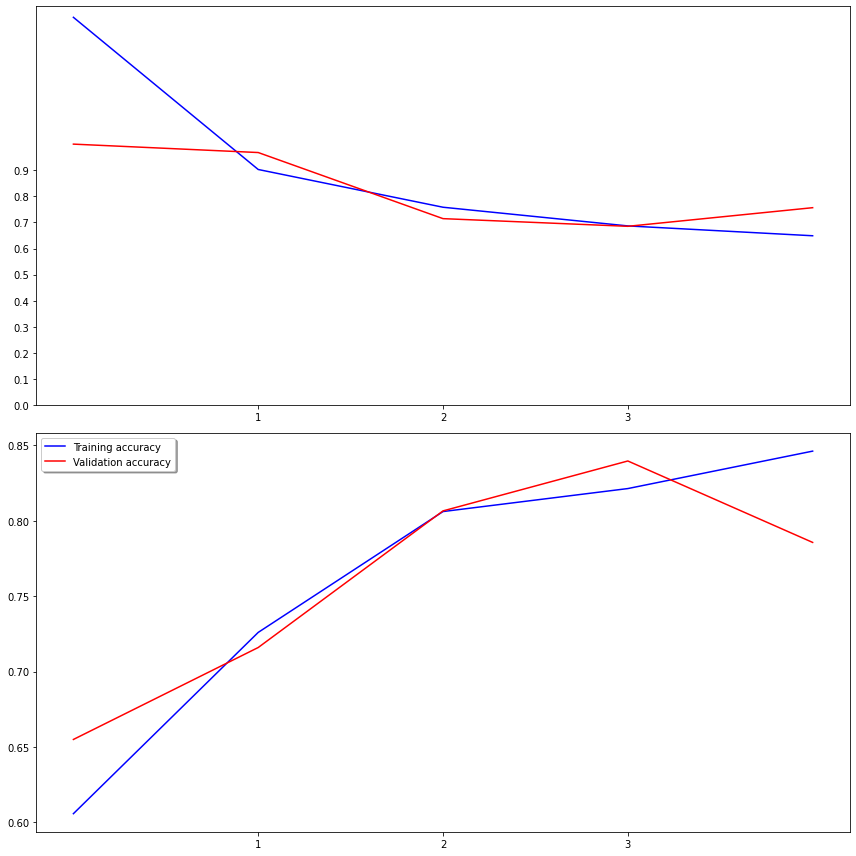

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(model5.history['loss'], color='b', label="Training loss")
ax1.plot(model5.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 4, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model5.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model5.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 4, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()